In [1]:
import numpy as np
import matplotlib.pyplot as plt

import qnmfits

As shown in [Cheung et al.](https://arxiv.org/abs/2208.07374) and [Mitman et al.](https://arxiv.org/abs/2208.07380), nonlinear quasinormal modes can be measured in the $(4,4)$ mode of SXS waveforms.

The `qnmfits` package allows nonlinear QNMs to be included in the fit. To do so, provide a tuple of the form

$$ (\ell_0, m_0, n_0, \pm_0, \ell_1, m_1, n_1, \pm_1, \ldots). $$

This will include a mode with frequency

$$ \omega = \omega_{\ell_0 m_0 n_0 \pm_0} + \omega_{\ell_1 m_1 n_1 \pm_1} + \ldots. $$

### Example fit to the $h_{44}$ mode

In [2]:
sim = qnmfits.SXS(305, zero_time=(2,2))

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


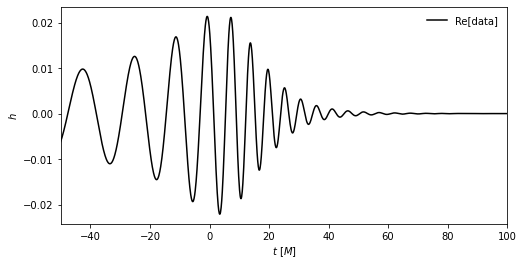

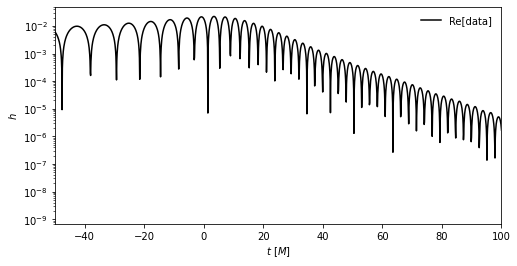

In [3]:
qnmfits.plot_ringdown(sim.times, sim.h[4,4])
qnmfits.plot_ringdown(sim.times, sim.h[4,4], log=True)

Perform a fit $20\ M$ after the time of peak strain with the $(4,4,0)$, $(4,4,1)$, and $(2,2,0) \times (2,2,0)$ quadratic mode (which has frequency $2\omega_{220}$).

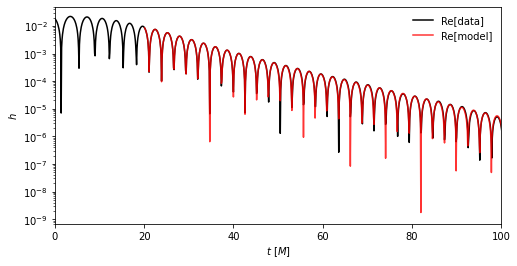

In [4]:
best_fit = qnmfits.ringdown_fit(
    sim.times, 
    sim.h[4,4], 
    modes=[(4,4,0,1),(4,4,1,1),(2,2,0,1,2,2,0,1)],
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=20
)

qnmfits.plot_ringdown(
    sim.times, 
    sim.h[4,4], 
    xlim=[0,100],
    best_fit=best_fit,
    log=True
)

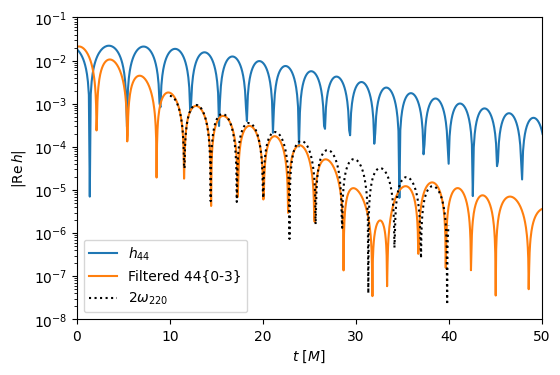

In [5]:
t_filtered, h_filtered = qnmfits.rational_filter(
    sim.times, 
    sim.h[4,4], 
    modes=[(4,4,0,1), (4,4,1,1), (4,4,2,1), (4,4,3,1)], 
    Mf=sim.Mf, 
    chif=sim.chif_mag
)

best_fit = qnmfits.ringdown_fit(
    t_filtered, 
    h_filtered, 
    modes=[(2,2,0,1,2,2,0,1)],
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=10,
    T=30
)

fig, ax = plt.subplots(dpi=100)

ax.plot(sim.times, abs(np.real(sim.h[4,4])), label=r'$h_{44}$')
ax.plot(t_filtered, np.abs(np.real(h_filtered)), label='Filtered 44{0-3}')
ax.plot(best_fit['model_times'], abs(np.real(best_fit['model'])), 'k:', label=r'$2\omega_{220}$')

ax.set_xlim(0, 50)
ax.set_ylim(1e-8, 1e-1)

ax.set_yscale('log')

ax.set_xlabel('$t\ [M]$')
ax.set_ylabel('$|\mathrm{Re}\,h|$')

plt.legend(loc='lower left')
plt.show()